# Generic ALP realignment

In [6]:
%run runner.py
%run observables.py
%run analysis_tools.py
%run plot_tools.py
import tqdm.notebook
import matplotlib as mpl
import pickle

In [ ]:
run_generic_alp()

## Parameter space from paper

In [4]:
def plot(version, f_a):
    H_inf_index = 0
    f_a_index = 0
    data = load_data("generic_alp", version)
    eta = data["eta"][H_inf_index, :, :, f_a_index]
    m_a = data["m_a"]
    Gamma_inf = data["Gamma_inf"]
    H_inf = data["H_inf"]
    
    if f_a is None:
        f_a = data["f_a"][f_a_index]
        dilution = data["dilution"][H_inf_index, :, :, f_a_index]
    else:
        rho_end_rad = data["rho_end_rad"][H_inf_index, :, :, f_a_index]
        rho_end_axion = data["rho_end_axion"][H_inf_index, :, :, f_a_index]     
        f_a_used = data["f_a"][f_a_index]
        dilution = np.zeros(eta.shape)
        for i in tqdm.notebook.tqdm(range(len(Gamma_inf))):
            for j in range(len(m_a)):
                dilution[i, j] = compute_dilution_factor_from_axion_decay(10.0, 
                        rho_end_rad[i, j], rho_end_axion[i, j] / f_a_used**2 * f_a**2, 
                        (m_a[j],), f_a, axion_motion.realignment_axion_field, False)  
    
    eta_B = np.abs(dilution * eta)
    A = np.log10(eta_B / eta_B_observed)
    levels = find_level(np.log10(m_a), np.log10(Gamma_inf), A)
    
    plt.figure()
    plt.contour(m_a, Gamma_inf, A)
    for xs, ys in levels:
        plt.plot(10**xs, 10**ys, "r", lw=3)
    plt.xscale("log")
    plt.yscale("log")
    plt.colorbar(label=r"$log_{10}(\eta_B / \eta_B^\mathrm{obs})$")
    plt.xlabel("$m_a$ / GeV")
    plt.ylabel(r"$\Gamma_\mathrm{inf}$ / GeV")
    plt.title(f"f_a = {f_a:.2e}, H_inf = {H_inf[H_inf_index]:.2e}")

  0%|          | 0/30 [00:00<?, ?it/s]

/net/cip/home/janik.riess/masters-project/transport_eq_in_time/decay_process.py:13: RuntimeWarning: invalid value encountered in sqrt
  H = np.sqrt(rho_field + rho_rad) * C # NOTE: sometimes with is evalulated at weird arguments -> warnings


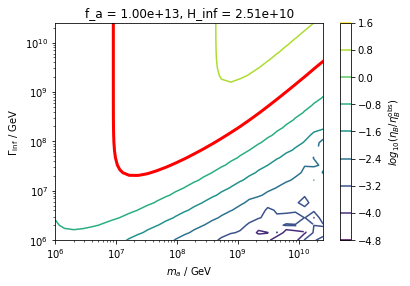

In [7]:
plot(1, 1e13)

In [11]:
version = 1
H_inf_index = 0
f_a_index = 0
data = load_data("generic_alp", version)
eta = data["eta"][H_inf_index, :, :, f_a_index]
m_a = data["m_a"]
Gamma_inf = data["Gamma_inf"]
H_inf = data["H_inf"]
rho_end_rad = data["rho_end_rad"][H_inf_index, :, :, f_a_index]
rho_end_axion = data["rho_end_axion"][H_inf_index, :, :, f_a_index]     
f_a_used = data["f_a"][f_a_index]

f_a_list = np.geomspace(1e12, 1e15, 10)
correct_asym_curves = []

for f_a in tqdm.notebook.tqdm(f_a_list, position=0):
    dilution = np.zeros(eta.shape)
    for i in tqdm.notebook.tqdm(range(len(Gamma_inf)), leave=False, position=1):
        for j in tqdm.notebook.tqdm(range(len(m_a)), leave=False, position=2):
            dilution[i, j] = compute_dilution_factor_from_axion_decay(10.0, 
                    rho_end_rad[i, j], rho_end_axion[i, j] / f_a_used**2 * f_a**2, 
                    (m_a[j],), f_a, axion_motion.realignment_axion_field, False)  
    eta_B = np.abs(dilution * eta)
    A = np.log10(eta_B / eta_B_observed)
    levels = find_level(np.log10(m_a), np.log10(Gamma_inf), A)
    correct_asym_curves.append([(10**xs, 10**ys) for xs, ys in levels])

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [13]:
save = True
fname = os.path.join(datadir, "generic_alp_correct_curves.pkl")
if save:
    with open(fname, "wb") as fhandle:
        pickle.dump((f_a_list, correct_asym_curves), fhandle)
else:
    with open(fname, "rb") as fhandle:
        f_a_list, correct_asym_curves = pickle.load(fhandle)

Text(0.5, 1.0, '$\\eta_B = \\eta_B^\\mathrm{obs}$ for $H_inf = 2.51\\cdot 10^{10} \\, \\mathrm{GeV}$')

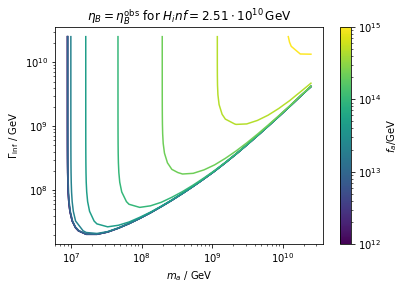

In [14]:
cmap = plt.cm.get_cmap("viridis")
norm = mpl.colors.LogNorm(vmin=np.min(f_a_list), vmax=np.max(f_a_list))
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

for f_a, curve in zip(f_a_list, correct_asym_curves):
    c = mappable.to_rgba(f_a)
    for xs, ys in curve:
        plt.loglog(xs, ys, color=c)

plt.colorbar(mappable=mappable, label=r"$f_a / \mathrm{GeV}$")
plt.xlabel("$m_a$ / GeV")
plt.ylabel(r"$\Gamma_\mathrm{inf}$ / GeV")
plt.title(f"$\\eta_B = \\eta_B^\\mathrm{{obs}}$ for $H_inf = {latex_exponential_notation(H_inf[H_inf_index], 2)} \\, \\mathrm{{GeV}}$")
#plt.legend()

## Example Evolution 

In [27]:
list(Status)

[<Status.OK: 1>,
 <Status.ASYM_CONVERGENCE_FAILURE: 2>,
 <Status.RELIC_DENSITY_CONVERGENCE_FAILURE: 3>,
 <Status.AXION_OSCILLATES_BEFORE_INFLATION: 4>,
 <Status.INFLATON_DECAYS_DURING_INFLATION: 5>,
 <Status.ISOCURVATURE_BOUNDS: 6>]

conv factor: 0.0001
step = 1
T_max = 3.150450e+12
t_eq = 1.3558333896776984
tmax_inf_time = 1.3558333896776984, tmax_axion_time = 13558.333896776983
calculcated initial integration time:
tmax_inf_time = 1.3558333896776984 tmax_axion_time = 13558.333896776983
rh: 0.06882023811340332
axion: 21.306164979934692
transport eq.: 32.97868227958679
B-L start .. end: 0.0 -1.4947714227565603e-13
B-L range: -1.8917740059409886e-10 1.569160404742297e-11
delta = 90.23626568243176 rtol_asym = 0.001
step = 2
rh: 0.0010192394256591797
axion: 0.01532888412475586
transport eq.: 0.04499530792236328
B-L start .. end: -1.4947714227555263e-13 -1.801836884625291e-13
B-L range: -1.801836884625291e-13 -1.4947714227555263e-13
delta = 0.186284955260906 rtol_asym = 0.001
step = 3
rh: 0.0009961128234863281
axion: 0.015023231506347656
transport eq.: 0.0441889762878418
B-L start .. end: -1.801836884625291e-13 -2.1077903918908614e-13
B-L range: -2.1077903918908614e-13 -1.801836884625291e-13
delta = 0.15650808712996367

/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:13: RuntimeWarning: invalid value encountered in sqrt
  H = np.sqrt(rho_field + rho_rad) * C # NOTE: sometimes with is evalulated at weird arguments -> warnings


(6.286168551386942e-14,
 0.9999334525172299,
 1.2117873929199524e+48,
 0.0,
 0.0,
 1.0)

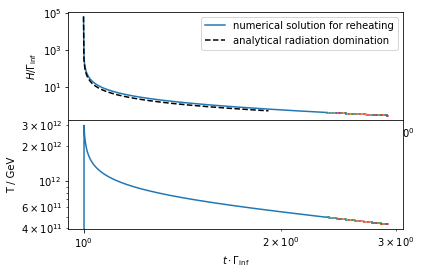

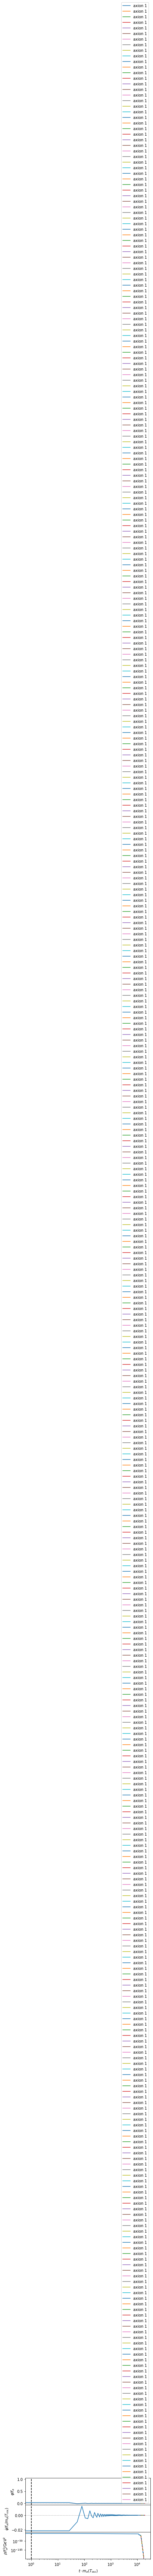

/home/jana/anaconda3/envs/ma/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


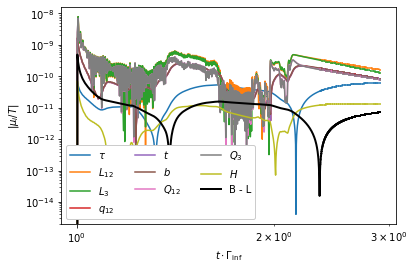

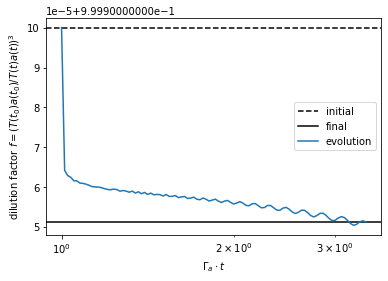

In [30]:
%run observables.py
f_a = 1e15
Gamma_inf = 1e6
m_a = 1e10
H_inf = f_a*2*np.pi*1e-5 
compute_observables(H_inf, Gamma_inf, (m_a,), f_a, 
                    axion_motion.realignment_axion_field, (1.0, 0.0),
                    calc_init_time=True, debug=True)

/tmp/ipykernel_268172/2417038191.py:25: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(taxs, np.array([source_vector @ gamma for gamma in gammas]) * theta_dots / Ts)


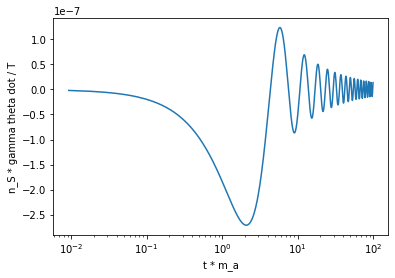

In [42]:
%run observables.py

scale = decay_process.find_scale(Gamma_inf)
axion_model = axion_motion.realignment_axion_field
axion_parameter = (m_a,)
energy_scale = axion_model.find_dynamical_scale(*axion_parameter)
conv_factor = Gamma_inf / energy_scale
source_vector = transport_equation.source_vector_weak_sphaleron
tmax_axion = 100.0
sol_rh, T_and_H_fn, T_and_H_and_T_dot_fn, sol_axion, axion_source, sol_transp_eq, tmax_axion = \
    solve_system(H_inf, 0.0, 3*decay_process.M_pl**2*H_inf**2, (1.0, 0.0), np.zeros(transport_equation.N),
                 tmax_axion, conv_factor, Gamma_inf, scale, 
                 axion_parameter, axion_model, source_vector,
                 False, False)
tmax_inf = tmax_axion * conv_factor
tinfs = np.geomspace(decay_process.t0, decay_process.t0 + tmax_inf, 500)
taxs = (tinfs - decay_process.t0) / conv_factor
Ts, Hs = T_and_H_fn(tinfs)
theta_dots = sol_axion.sol(taxs)[1, :]
theta = sol_axion.sol(taxs)[0, :]

gammas = [transport_equation.calc_rate_vector(T) for T in Ts]

plt.figure()
plt.plot(taxs, np.array([source_vector @ gamma for gamma in gammas]) * theta_dots / Ts)
plt.xlabel("t * m_a")
plt.ylabel("n_S * gamma theta dot / T")
plt.xscale("log")

/tmp/ipykernel_268172/1968492455.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.semilogx(taxs, np.array([source_vector @ gamma for gamma in gammas]) * theta_dots / Ts)


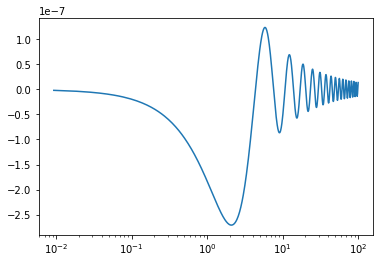

In [44]:
plt.semilogx(taxs, np.array([source_vector @ gamma for gamma in gammas]) * theta_dots / Ts)